# Naive fit of the transverse diffusion data  from EXO 200 to interpolate

> Ricardo Peres, 06.05.2020

Based on data from  [Measurement of the drift velocity and transverse diffusion of electrons in liquid xenon with the EXO-200 detector (2017)](https://doi.org/10.1103/PhysRevC.95.025502).

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import curve_fit

In [3]:
def func_lin(x,a,b):
    return a*x+b

#### Digitized data

In [4]:
field = np.array([9.970242696779245,21.174006187374857,47.25304314138346,137.98876772710062,315.54038976756215,561.9694826531345])
Diff_trans = np.array([48.40664608852609,56.46406460835195,54.15330464410083,55.97209183558513,55.26172040265065,60.50308797280282])
Diff_trans_error_up_data = np.array([71.96416099015404,73.04834360988653,65.83798344235743,66.90263935932389,59.87833362122706,69.45482947931299])
Diff_trans_error_down_data = np.array([24.849431597709852,39.69132789089085,42.6576843833943,45.230002027773,50.36212019937268,51.45711760832944])
Diff_trans_error_up = Diff_trans_error_up_data-Diff_trans
Diff_trans_error_down = Diff_trans - Diff_trans_error_down_data

#### Linear fit

In [5]:
(m,b), pcov = curve_fit(func_lin, field, Diff_trans, sigma = (Diff_trans_error_down+Diff_trans_error_up))
m_err, b_err = np.sqrt(np.diag(pcov))

linfit_result = scipy.stats.linregress(field,Diff_trans)
m_linregress = linfit_result.slope
m_linregress_error = linfit_result.stderr
b_linregress = linfit_result.intercept
b_linregress_error = linfit_result.intercept_stderr
r_linregress = linfit_result.rvalue

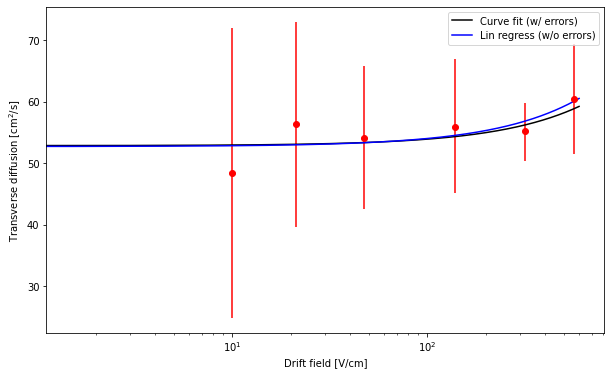

In [12]:
plt.figure(figsize=(10,6))
plt.errorbar(field, Diff_trans, (Diff_trans_error_down, Diff_trans_error_up), ls = '', marker = 'o', c = 'r') 
_x = np.linspace(0,600, 400)
plt.plot(_x, func_lin(_x, m,b), color = 'k',ls = '-', label = 'Curve fit (w/ errors)')
plt.plot(_x, func_lin(_x, m_linregress,b_linregress), color = 'b',ls = '-', label = 'Lin regress (w/o errors)')
plt.legend()
plt.xscale('log')
plt.ylabel('Transverse diffusion [cm$^2$/s]')
plt.xlabel('Drift field [V/cm]')
plt.show()

In [14]:
print('Curve fit: m=%f; b=%f' %(m,b))
print('Linregress: m=%f; b=%f' %(m_linregress,b_linregress))

Curve fit: m=0.010635; b=52.888942
Linregress: m=0.013021; b=52.752949
